# Import Libraries

In [57]:
import string
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Loading

Downloading netflix movies and shows dataset from kaggle using API

In [2]:
 ! pip install -q kaggle

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d ashfakyeafi/netflix-movies-and-shows-dataset

  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 113MB/s]


In [5]:
!unzip /content/netflix-movies-and-shows-dataset.zip

Archive:  /content/netflix-movies-and-shows-dataset.zip
  inflating: netflix_data.csv        


Data Reading

In [6]:
df=pd.read_csv('/content/netflix_data.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Data Understanding

dalam dataset yang digunakan yaitu netflix_data terdapat kolom kolom dibawah ini juga penjelasan pada masing masing kolom


*   show_id: Unique ID for every Movie / Tv Show
*   type : Identifier - A Movie or TV Show
*   title : Title of the Movie / Tv Show
*   Director : Director of the movie
*   cast  : Actors involved in the movie / show




# Data Assesing

langkah pertama yang perlu dilakukan adalah memeriksa tipe tipe data yang terdapat pada dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


dapat dilihat setelah dilakukan pengecekan ternyata terdapat perbedaan jumlah entry data pada beberapa kolom yang terdapat pada dataset

In [8]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

dapat dilihat jika pada kolom director terdapat 2634 missing value, kolom cast terdapat 825 missing value, kolom country terdapat 831 missing value, kolom date_added terdapat 10 missing value, rating 4 dan duration 3 missing value

kemudian langkah selanjutnya adalah melakukan pengecekan apakah dalam dataset terdapat data yang duplikat

In [9]:
print("jumlah data yang duplikat pada days df:{}".format(df.duplicated().sum()))

jumlah data yang duplikat pada days df:0


dapat dilihat  dalam dataset tidak terdapat entry data yang bernilai duplikat selnjutnya kita akan melakukan ringkasan statistik pada dataset

In [10]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Data Cleaning

In [11]:
df.fillna('',inplace=True)

# Exploratory Data Analysis

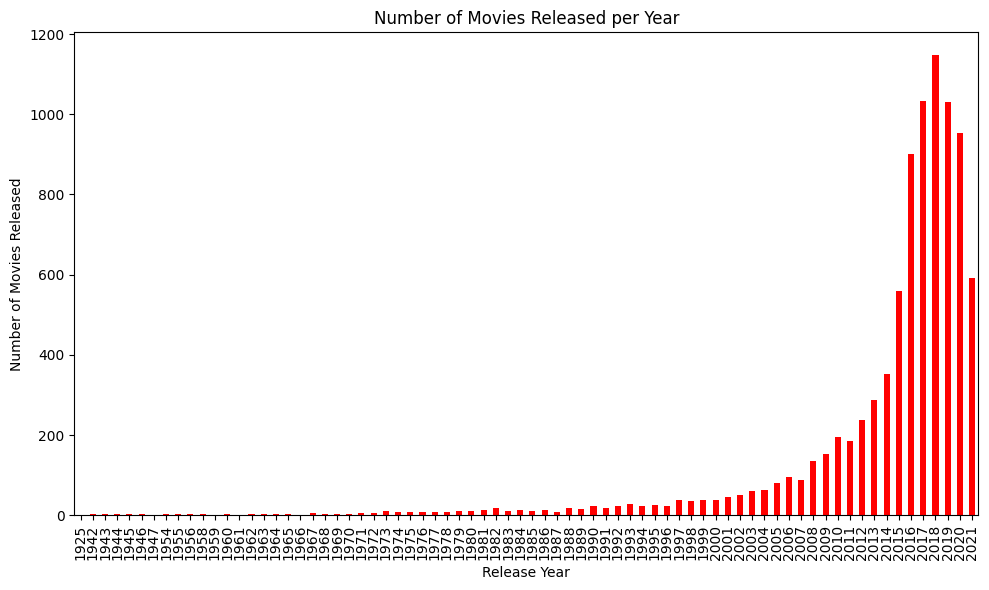

In [12]:
movies_released=df['release_year'].value_counts().sort_index()

# Calculate the number of movies released per year
movies_released = df['release_year'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
movies_released.plot(kind='bar', color='red')

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released per Year')

# Show the plot
plt.tight_layout()
plt.show()

Berdasarkan visualisasi bar chart yang ditampilkan, terdapat sebuah wawasan menarik yang dapat disimpulkan. Dapat diamati bahwa semakin modern suatu film, maka jumlah produksinya cenderung meningkat. Data pada bar chart menunjukkan bahwa pada tahun 2018 merupakan puncak produksi film bagi Netflix, mengindikasikan bahwa pada tahun tersebut, platform tersebut menghasilkan jumlah film terbanyak dalam rentang waktu tertentu.

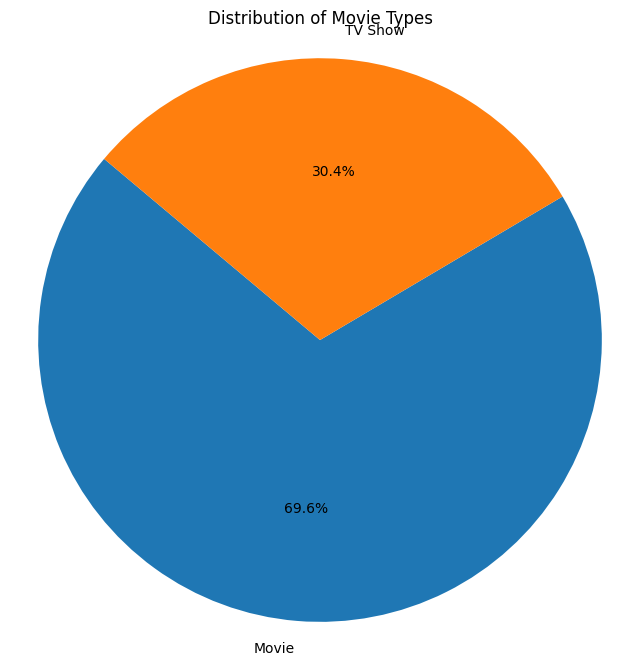

In [13]:
movies_types_plot=df['type'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.pie(movies_types_plot, labels=movies_types_plot.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Movie Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

berdasarkan dari hasil plotting menggunakan pie chart diatas dapat dilihat jika pada dataset terdapat persentase 69.6% film yang dikategorikan sebagai movies dan 30.4% sebagai tf program


In [14]:
df['country'] = df['country'].astype('category')

In [15]:
top_countries = df['country'].value_counts().head(10)

fig = px.treemap(names=top_countries.index, parents=["" for _ in top_countries.index], values=top_countries.values)

fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',
    paper_bgcolor='rgb(17, 17, 17)',
    font_color='white',
    title='Top Countries with Highest Number of Movies',
)
fig.show()

dapat dilihat pada plot diatas jika amerika merupakan negara dengan jumlah movie distributor movie terbanyak dengan jumlah movie beredar sebanyak 2818

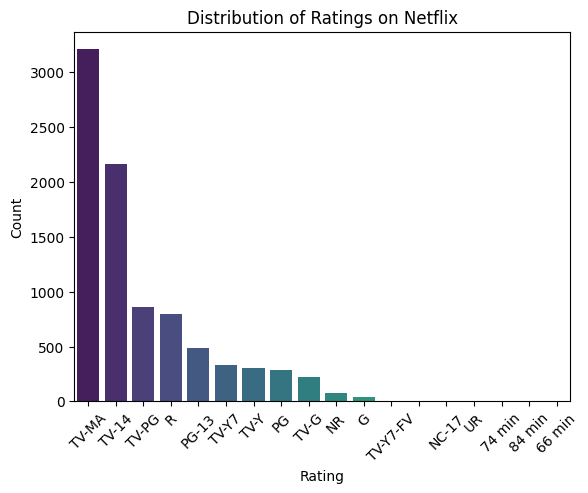

In [18]:
ratings=list(df['rating'].value_counts().index)
ratings_count=list(df['rating'].value_counts().values)
sns.barplot(x=ratings,y=ratings_count,palette="viridis")

# Adding labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings on Netflix')

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [30]:
durations      = list(df['duration'].value_counts().index)
durations_counts = list(df['duration'].value_counts().values)

fig = go.Figure(data=[go.Bar(
    x=durations,
    y=durations_counts,
    marker_color='#E50914'
)])

fig.update_layout(
    title='Movie Durations Distribution',
    xaxis_title='Rating',
    yaxis_title='Count',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0.7)',
    font=dict(
        color='white'
    )
)

fig.show()

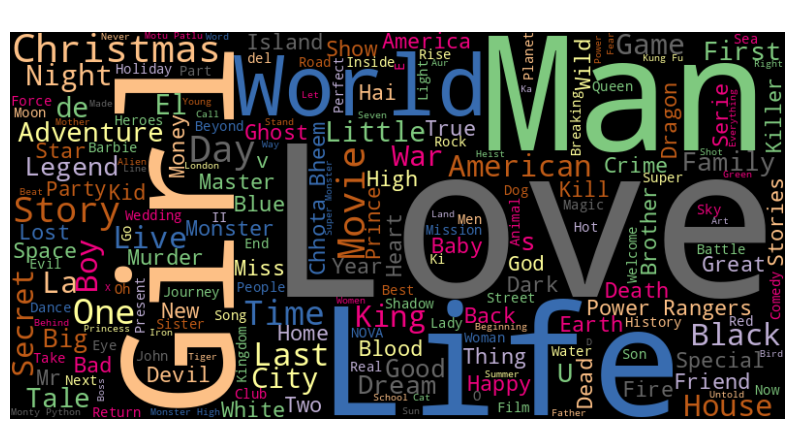

In [33]:
titles=df['title'].values
text=' '.join(titles)
wordcloud=WordCloud(width=800,height=400,background_color='black',colormap='Accent').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Titles', color='white')
plt.show()


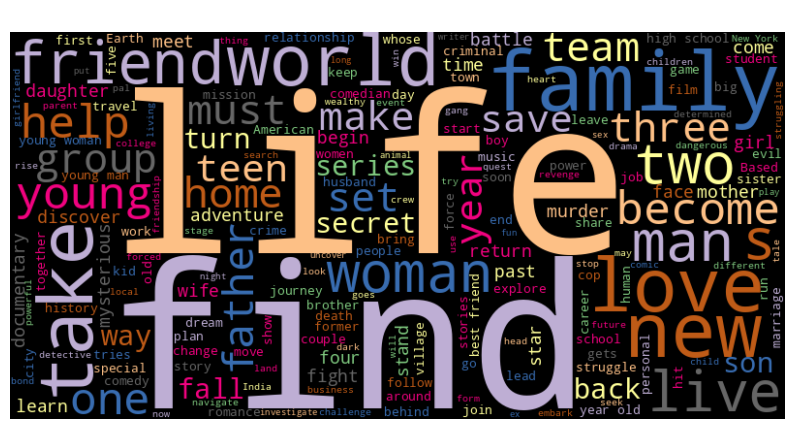

In [34]:
description=df['description'].values
text=' '.join(description)

wordcloud=WordCloud(width=800,height=400,background_color='black',colormap='Accent').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Description', color='white')
plt.show()

# Feature Engineering

In [35]:
new_df=df[['title','type','director','cast','rating','listed_in','description']]
new_df.set_index('title',inplace=True)

In [37]:
new_df.head(5)

,type,director,cast,rating,listed_in,description
title,,,,,,
Dick Johnson Is Dead,Movie,Kirsten Johnson,,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
Blood & Water,TV Show,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
Ganglands,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
Jailbirds New Orleans,TV Show,,,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
Kota Factory,TV Show,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [38]:
class TextCleaner:
    def separate_text(self, texts):
        unique_texts = set()
        for text in texts.split(','):
            unique_texts.add(text.strip().lower())
        return ' '.join(unique_texts)

    def remove_space(self, texts):
        return texts.replace(' ', '').lower()

    def remove_punc(self, texts):
        texts = texts.lower()
        texts = texts.translate(str.maketrans('', '', string.punctuation))
        return ' '.join(texts.split())

    def clean_text(self, texts):
        texts = self.separate_text(texts)
        texts = self.remove_space(texts)
        texts = self.remove_punc(texts)
        return texts

In [39]:
cleaner = TextCleaner()

In [43]:
new_df['type']        = new_df['type'].apply(cleaner.remove_space)
new_df['director']    = new_df['director'].apply(cleaner.separate_text)
new_df['cast']        = new_df['cast'].apply(cleaner.separate_text)
new_df['rating']      = new_df['rating'].apply(cleaner.remove_space)
new_df['listed_in']   = new_df['listed_in'].apply(cleaner.separate_text)
new_df['description'] = new_df['description'].apply(cleaner.remove_punc)

<ipython-input-43-fa955c25629a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-fa955c25629a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-fa955c25629a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-fa955c2

In [44]:
new_df.head()

,type,director,cast,rating,listed_in,description
title,,,,,,
Dick Johnson Is Dead,movie,kirsten johnson,,pg-13,documentaries,as her father nears the end of his life filmma...
Blood & Water,tvshow,,dillon windvogel gail mabalane odwa gwanya nat...,tv-ma,tv dramas international tv shows tv mysteries,after crossing paths at a party a cape town te...
Ganglands,tvshow,julien leclercq,bakary diombera salim kechiouche noureddine fa...,tv-ma,tv action & adventure international tv shows c...,to protect his family from a powerful drug lor...
Jailbirds New Orleans,tvshow,,,tv-ma,reality tv docuseries,feuds flirtations and toilet talk go down amon...
Kota Factory,tvshow,,jitendra kumar urvi singh ranjan raj ahsaas ch...,tv-ma,tv comedies international tv shows romantic tv...,in a city of coaching centers known to train i...


In [47]:
# Concatenate non-null values of each row into a new column 'BoW'
new_df['BoW'] = new_df.apply(lambda row: ' '.join(row.dropna().values), axis=1)

# Drop all columns except the 'BoW' column
new_df.drop(new_df.columns[:-1], axis=1, inplace=True)

<ipython-input-47-0fd1ced91af4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-0fd1ced91af4>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
new_df.head()

,BoW
title,
Dick Johnson Is Dead,movie kirsten johnson pg-13 documentaries as ...
Blood & Water,tvshow dillon windvogel gail mabalane odwa gw...
Ganglands,tvshow julien leclercq bakary diombera salim k...
Jailbirds New Orleans,tvshow tv-ma reality tv docuseries feuds fli...
Kota Factory,tvshow jitendra kumar urvi singh ranjan raj a...


In [52]:
tfid = TfidfVectorizer()
tfid_matrix = tfid.fit_transform(new_df['BoW'])

In [54]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have already calculated tfidf_matrix
cosine_sim = cosine_similarity(tfid_matrix, tfid_matrix)

# Now cosine_sim is a symmetric matrix where each entry (i, j) represents the cosine similarity between document i and document j
print(cosine_sim)

[[1.         0.00504833 0.02011193 ... 0.01065369 0.02109898 0.03048859]
 [0.00504833 1.         0.01714561 ... 0.00103121 0.         0.00481712]
 [0.02011193 0.01714561 1.         ... 0.00560911 0.01042642 0.0333502 ]
 ...
 [0.01065369 0.00103121 0.00560911 ... 1.         0.05649084 0.00600011]
 [0.02109898 0.         0.01042642 ... 0.05649084 1.         0.01046521]
 [0.03048859 0.00481712 0.0333502  ... 0.00600011 0.01046521 1.        ]]


In [55]:

# Save the TF-IDF matrix
np.save('tfidf_matrix.npy', tfid_matrix)

# Save the cosine similarity matrix
np.save('cosine_sim_matrix.npy', cosine_sim)

In [58]:
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfid, f)

In [60]:
final_data = df[['title', 'type']]

In [61]:
final_data.head()

,title,type
0,Dick Johnson Is Dead,Movie
1,Blood & Water,TV Show
2,Ganglands,TV Show
3,Jailbirds New Orleans,TV Show
4,Kota Factory,TV Show


In [69]:
import re
class FlixHub:
  def __init__(self,df,cosine_sim):
    self.df=df
    self.cosine_sim=cosine_sim
  def recommendation(self, title, total_result=5, threshold=0.5):
    # Find the index of the input title
    idx = self.find_id(title)

    # Calculate similarity and add it as a new column in the DataFrame
    self.df['similarity'] = self.cosine_sim[idx]

    # Sort the DataFrame by similarity in descending order and select top 'total_result' + 1 (excluding the input title itself)
    sort_df = self.df.sort_values(by='similarity', ascending=False)[1:total_result+1]

    # Filter movies and TV shows separately from the sorted DataFrame
    movies = sort_df['title'][sort_df['type'] == 'Movie']
    tv_shows = sort_df['title'][sort_df['type'] == 'TV Show']

    similar_movies = []
    similar_tv_shows = []

    for i, movie in enumerate(movies):
        similar_movies.append('{}. {}'.format(i+1, movie))

    for i, tv_show in enumerate(tv_shows):
        similar_tv_shows.append('{}. {}'.format(i+1, tv_show))

    return similar_movies, similar_tv_shows

  def find_id(self, name):
      for index, string in enumerate(self.df['title']):
          if re.search(name, string):
              return index
      return -1


In [70]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Blood & Water', total_result=10, threshold=0.5)

<ipython-input-69-579feb1ad295>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Shirkers
2. Frank and Cindy
3. Adam: His Song Continues
4. Walk Away from Love
5. Mom

Similar TV_show(s) list:
1. Diamond City
2. Kings of Jo'Burg
3. Lion Pride
4. Forget Me Not
5. Horrid Henry
